<img src="https://i.ibb.co/TcVMz44/logo.jpg" alt="logo" border="0" width=200>

# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia


## Animated Motion of a Comet. 

### About this notebook

In this notebook we read the data obtained in a previous notebook to visualize the orbital motion of a comet around the Sun.


---

## A Comet-Sun System

We will read the file `'comet_orbit.txt'` obtained in a previous notebook to visualize the orbital motion of a comet around the Sun.

The system of units used is

- unit of mass: Solar mass
- units of distance: au
- units of time: years


In [1]:
path=''

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/AC/Colab Notebooks/13. Animated Visualization/'


Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read and unpack the data from the file.
# The format includes coordinates and velocities: x y vx vy
x, y, vx, vy = np.loadtxt(path+'comet_orbit.txt', unpack=True)

In [4]:
x

array([1.        , 0.99999997, 0.99999987, ..., 0.88561269, 0.88548766,
       0.88536255])

---
## Simple 2D Plot

First we make a simple plot to see the orbit:

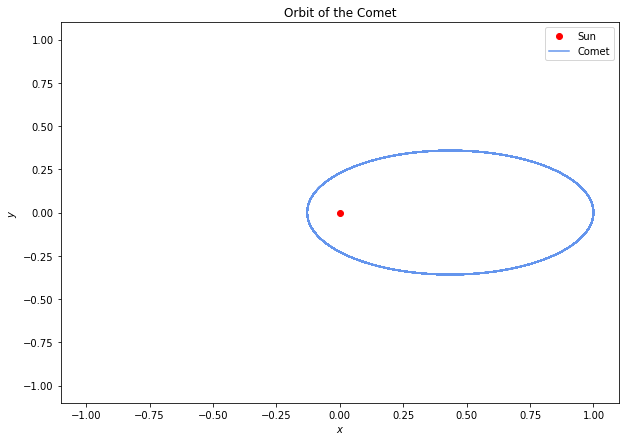

In [5]:

# Boundaries of the plot
boundary = max(abs(np.max(x)), abs(np.min(x)), abs(np.max(y)), abs(np.min(y)))*1.1

fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(0., 0., 'ro', label = 'Sun')
ax.plot(x, y, color='cornflowerblue', label=f'Comet')
ax.set_title('Orbit of the Comet')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xlim(-boundary,boundary)
ax.set_ylim(-boundary,boundary)
ax.legend()


plt.show()

---

## Creating the Animation

In order to crrate the animation, we need the functions `matplotlib.animation`.

To display the animation as a movie in the webpage, we will use the function `IPython.display.HTML`

In [6]:
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

First, we will setup the figure and the axes

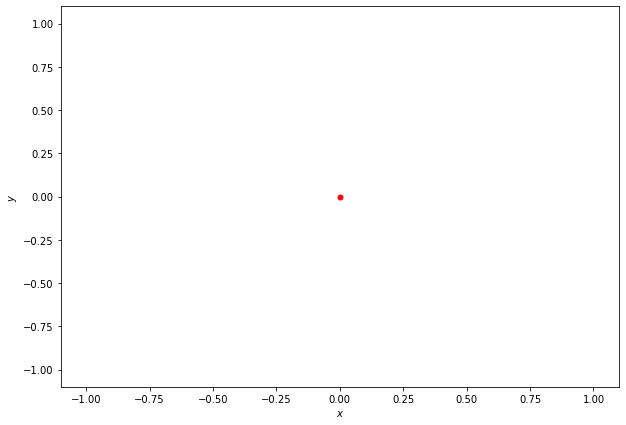

In [7]:
# create a figure and axes
fig, ax = plt.subplots(figsize=(10,7))
ax.set_xlim(-boundary, boundary)
ax.set_ylim(-boundary, boundary)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

# Create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.

# Defines the characteristics of the ploted line (size=2)
line1, = ax.plot([], [], lw=2) 
# Defines the characteristics of the ploted point (size=5)
pt1, = ax.plot([], [], 'bo', ms=5)
# Defines the plot's title
txt_title = ax.set_title('')

# Defines the location of the Sun
pt2, = ax.plot(0., 0., 'ro', ms=5)

In [8]:
# Total number of frames
N = len(x)
N

500000

We need to define an animate function to draw the data in each frame

In [9]:
def animate(i):
    x_data = x[0:100*i] # We draw from the initial point up to the point 100*i
    y_data = y[0:100*i] # We draw from the initial point up to the point 100*i
    line1.set_data(x_data, y_data)
    pt1.set_data(x[100*i],y[100*i]) # Draws a point at the comet's position
    txt_title.set_text('Frame = {0:4d}'.format(i))
    return (line1, pt1,)

Now we use the `FuncAnimation` function to create the animation frames. We use 500 frames with a duration of 20 each.

In [10]:
anim = animation.FuncAnimation(fig, animate, 
                               frames=500, interval=20,  # only 500 frames with a duration of 20 each
                               blit=True)
# blit=True re-draws only the parts that have changed.

We can transform the animation to a jshtml video using

In [11]:
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

or we can create a html5 video using

In [12]:
HTML(anim.to_html5_video())

---
## Animation Modification

In [13]:
def animate(i):
    x_data = x[100*i-1000:100*i] # We draw from the initial point up to the point 100*i
    y_data = y[100*i-1000:100*i] # We draw from the initial point up to the point 100*i
    line1.set_data(x_data, y_data)
    pt1.set_data(x[100*i],y[100*i]) # Draws a point at the comet's position
    txt_title.set_text('Frame = {0:4d}'.format(i))
    return (line1, pt1,)

anim = animation.FuncAnimation(fig, animate, 
                               frames=500, interval=20,  # only 500 frames with a duration of 20 each
                               blit=True)
# blit=True re-draws only the parts that have changed.

In [14]:
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.